In [87]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import calendar
from datetime import datetime

In [88]:
with open('20171205144547.txt') as f:
    content = f.readlines()
content = [x.strip() for x in content]
for x in content:
    print(x)

I D E A M  -  INSTITUTO DE HIDROLOGIA, METEOROLOGIA Y ESTUDIOS AMBIENTALES
SISTEMA DE INFORMACION
VALORES TOTALES DIARIOS DE PRECIPITACION (mms)                              NACIONAL AMBIENTAL

FECHA DE PROCESO :  2017/12/18                    ANO  1974                              ESTACION : 25020880  BARRANCO DE LOBA

LATITUD    0856 N               TIPO EST    PM                   DEPTO      BOLIVAR                 FECHA-INSTALACION   1974-SEP
LONGITUD   7406 W               ENTIDAD     01  IDEAM            MUNICIPIO  BARRANCO DE LOBA        FECHA-SUSPENSION
ELEVACION  0025 m.s.n.m         REGIONAL    02  ATLANTICO        CORRIENTE  BZO DE LOBA

************************************************************************************************************************************
DIA       ENERO *  FEBRE *  MARZO *  ABRIL *  MAYO  *  JUNIO *  JULIO *  AGOST *  SEPTI *  OCTUB *  NOVIE *  DICIE *
*********************************************************************************************

In [114]:
prec_df = pd.DataFrame(columns=['date', 'Prec'], index=[0])
c_index = 0
s_line = []
for line_num in range(0,len(content)):
    if 'ANO' in content[line_num]:
        values = content[line_num].split()
        data_gather_date = values[4]
        year =  int(values[6])
        print(data_gather_date, year)
        for i in range(10,41):
            by_day_line = content[line_num+i]
            day = int(by_day_line[0:5])
            for m in range(0,12):
                si = 5+m*9
                prec_val = None
                try:
                    prec_val = float(by_day_line[si:si+9])
                except ValueError:
                    pass
                try:
                    prec_date = datetime(year=year, month=(m+1), day=day)
                    prec_df.ix[c_index]=[prec_date,prec_val]
                    c_index +=1
                except ValueError:
                    pass
        line_num+=i


2017/12/18 1974


/Users/dduque/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:22: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



2017/12/18 1975
2017/12/18 1976
2017/12/18 1977
2017/12/18 1978
2017/12/18 1979
2017/12/18 1980
2017/12/18 1981
2017/12/18 1982
2017/12/18 1983
2017/12/18 1984
2017/12/18 1985
2017/12/18 1986
2017/12/18 1987
2017/12/18 1988
2017/12/18 1989
2017/12/18 1990
2017/12/18 1991
2017/12/18 1992
2017/12/18 1993
2017/12/18 1994
2017/12/18 1995
2017/12/18 1996
2017/12/18 1997
2017/12/18 1998
2017/12/18 1999
2017/12/18 2000
2017/12/18 2001
2017/12/18 2002
2017/12/18 2003
2017/12/18 2004
2017/12/18 2005
2017/12/18 2006
2017/12/18 2007
2017/12/18 2008
2017/12/18 2009
2017/12/18 2010
2017/12/18 2011
2017/12/18 2012
2017/12/18 2013
2017/12/18 2014
2017/12/18 2015
2017/12/18 2016


In [117]:
prec_df= prec_df.sort_values(['date'], ascending=[True])
print(prec_df.head())

                   date  Prec
0   1974-01-01 00:00:00   NaN
12  1974-01-02 00:00:00   NaN
24  1974-01-03 00:00:00   NaN
36  1974-01-04 00:00:00   NaN
48  1974-01-05 00:00:00   NaN


                     date  Prec
4018  1985-01-01 00:00:00   0.0
4030  1985-01-02 00:00:00   0.0
4042  1985-01-03 00:00:00   0.0
4054  1985-01-04 00:00:00   0.0
4066  1985-01-05 00:00:00   0.0
4078  1985-01-06 00:00:00   0.0
4090  1985-01-07 00:00:00   0.0
4102  1985-01-08 00:00:00   0.0
4114  1985-01-09 00:00:00   0.0
4126  1985-01-10 00:00:00   0.0
                      date  Prec
13424  2010-12-23 00:00:00   2.0
13436  2010-12-24 00:00:00   0.0
13448  2010-12-25 00:00:00  29.0
13460  2010-12-26 00:00:00   7.0
13472  2010-12-27 00:00:00   0.0
13484  2010-12-28 00:00:00   0.0
13495  2010-12-29 00:00:00   0.0
13506  2010-12-30 00:00:00   0.0
13513  2010-12-31 00:00:00   0.0
13514  2011-01-01 00:00:00   0.0


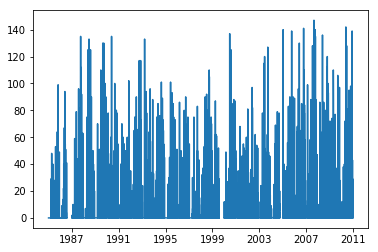

In [129]:
f_df = prec_df[(prec_df.date >= datetime(year=1985, month=1, day=1)) & (prec_df.date <= datetime(year=2011, month=1, day=1))]
print(f_df.head(10))
print(f_df.tail(10))
plt.plot(f_df['date'].tolist(), f_df['Prec'].tolist())
plt.show()